# Pretext
In a world ever more interconnected, the marriage of machine learning and agriculture gains profound significance. With our global population swelling, the study of crop yield becomes paramount. The intricate dance of weather patterns, chemical treatments, and historical insights determines agricultural success. Unlocking this puzzle holds the key to food security and resilience against climate flux.     

This project squarely addresses this challenge by deploying machine learning to predict the top 10 most-consumed crops worldwide. These essential staples like corn, wheat, and rice, form the bedrock of human sustenance. By harnessing the power of regression techniques, we develop a path to foresee yields, empowering farmers, as they can optimise resources.

In this notebook, I have aimed to provide deep, insightful analysis, and visualisation, unveiling meaningful information that will be of significant value, and have also finally built a regression model, that can predict yields on unseen test data, with a whopping R2 score of about 0.972!

<div style="background-color: #fce5cd; padding: 20px; border-radius: 10px;">
    <p style="font-size: 18px; text-align: center;"><em>Your support fuels inspiration!</em></p>
    <p style="font-size: 16px; text-align: center;">🌟 If this Notebook has brightened your path, I humbly invite you to join in celebrating the journey. An upvote is a resounding cheer, a way to echo "Bravo!"</p>
    <p style="font-size: 16px; text-align: center;">Let's cultivate a connection – a bridge for ideas to bloom. Your engagement uplifts, and I extend a warm welcome to connect, for in shared minds, brilliance blossoms.</p>
    <p style="font-size: 16px; text-align: center;">Together, let's revel in the wonder of exploration and the elegance of knowledge. 🚀🤝</p>
</div>



# Loading and reading the datasets

After importing required libraries, crops yield of ten most consumed crops around the world was downloaded from FAO webiste.The collected data include country, item, year starting from 1961 to 2016 and yield value

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ingesting the datasets 
pest_df=pd.read_csv('pesticides.csv')
rain_df=pd.read_csv('rainfall.csv')
temp_df=pd.read_csv('temp.csv')
yield_df=pd.read_csv('yield.csv')
data_frames=[pest_df,rain_df,temp_df,yield_df]

#reading a sample set of rows for all the ingested datasets 
for df in data_frames:
    print('A sample set of rows for {} is:\n'.format(df))
    display(df.sample(6))


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
A sample set of rows for               Domain      Area Element                Item  Year  \
0     Pesticides Use   Albania     Use  Pesticides (total)  1990   
1     Pesticides Use   Albania     Use  Pesticides (total)  1991   
2     Pesticides Use   Albania     Use  Pesticides (total)  1992   
3     Pesticides Use   Albania     Use  Pesticides (total)  1993   
4     Pesticides Use   Albania     Use  Pesticides (total)  1994   
...              ...       ...     ...                 ...   ...   

,Domain,Area,Element,Item,Year,Unit,Value
793,Pesticides Use,Chad,Use,Pesticides (total),2006,tonnes of active ingredients,42.00
2894,Pesticides Use,Norway,Use,Pesticides (total),1994,tonnes of active ingredients,848.00
1104,Pesticides Use,Croatia,Use,Pesticides (total),1995,tonnes of active ingredients,3418.00
895,Pesticides Use,"China, mainland",Use,Pesticides (total),2000,tonnes of active ingredients,1279533.00
3754,Pesticides Use,Syrian Arab Republic,Use,Pesticides (total),2012,tonnes of active ingredients,974.79
509,Pesticides Use,Botswana,Use,Pesticides (total),1992,tonnes of active ingredients,17.00


A sample set of rows for              Area  Year average_rain_fall_mm_per_year
0     Afghanistan  1985                           327
1     Afghanistan  1986                           327
2     Afghanistan  1987                           327
3     Afghanistan  1989                           327
4     Afghanistan  1990                           327
...           ...   ...                           ...
6722     Zimbabwe  2013                           657
6723     Zimbabwe  2014                           657
6724     Zimbabwe  2015                           657
6725     Zimbabwe  2016                           657
6726     Zimbabwe  2017                           657

[6727 rows x 3 columns] is:



,Area,Year,average_rain_fall_mm_per_year
2433,Grenada,2001,2350
2009,Ethiopia,2012,848
4664,Palau,2000,494
1807,Egypt,1995,51
777,Botswana,1987,416
4283,Nauru,1991,285


A sample set of rows for        year        country  avg_temp
0      1849  Côte D'Ivoire     25.58
1      1850  Côte D'Ivoire     25.52
2      1851  Côte D'Ivoire     25.67
3      1852  Côte D'Ivoire       NaN
4      1853  Côte D'Ivoire       NaN
...     ...            ...       ...
71306  2009         Mexico     21.76
71307  2010         Mexico     20.90
71308  2011         Mexico     21.55
71309  2012         Mexico     21.52
71310  2013         Mexico     22.19

[71311 rows x 3 columns] is:



,year,country,avg_temp
51742,1948,United States,9.03
7784,1793,Lebanon,19.73
17810,1944,United States,18.40
8418,1885,Serbia,10.17
49243,1895,France,9.83
55124,1909,Latvia,4.65


A sample set of rows for       Domain Code Domain  Area Code         Area  Element Code Element  \
0              QC  Crops          2  Afghanistan          5419   Yield   
1              QC  Crops          2  Afghanistan          5419   Yield   
2              QC  Crops          2  Afghanistan          5419   Yield   
3              QC  Crops          2  Afghanistan          5419   Yield   
4              QC  Crops          2  Afghanistan          5419   Yield   
...           ...    ...        ...          ...           ...     ...   
56712          QC  Crops        181     Zimbabwe          5419   Yield   
56713          QC  Crops        181     Zimbabwe          5419   Yield   
56714          QC  Crops        181     Zimbabwe          5419   Yield   
56715          QC  Crops        181     Zimbabwe          5419   Yield   
56716          QC  Crops        181     Zimbabwe          5419   Yield   

       Item Code   Item  Year Code  Year   Unit  Value  
0             56  Maize      

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
38914,QC,Crops,166,Panama,5419,Yield,83,Sorghum,1997,1997,hg/ha,23824
4536,QC,Crops,17,Bermuda,5419,Yield,116,Potatoes,2000,2000,hg/ha,227273
12498,QC,Crops,46,Congo,5419,Yield,116,Potatoes,1989,1989,hg/ha,84042
15135,QC,Crops,250,Democratic Republic of the Congo,5419,Yield,27,"Rice, paddy",1985,1985,hg/ha,8020
17080,QC,Crops,59,Egypt,5419,Yield,83,Sorghum,2013,2013,hg/ha,53777
49253,QC,Crops,212,Syrian Arab Republic,5419,Yield,27,"Rice, paddy",1989,1989,hg/ha,50000


# Performing Feature Engineering and Null value imputation

In [2]:
# Dropping unnecessary columns, as they wont be of anu help to find patterns in our
# data
pest_df=pest_df.drop(['Unit','Domain','Element','Item'],axis=1)
yield_df=yield_df.drop(['Domain Code','Domain','Area Code','Element Code','Item Code','Year Code','Unit'],axis=1)
pest_df.head()

,Area,Year,Value
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [3]:
yield_df.head()

,Area,Element,Item,Year,Value
0,Afghanistan,Yield,Maize,1961,14000
1,Afghanistan,Yield,Maize,1962,14000
2,Afghanistan,Yield,Maize,1963,14260
3,Afghanistan,Yield,Maize,1964,14257
4,Afghanistan,Yield,Maize,1965,14400


In [4]:
yield_df.columns

Index(['Area', 'Element', 'Item', 'Year', 'Value'], dtype='object')

In [5]:
rain_df.rename(columns = {' Area':'Area'},inplace = True)
for df in data_frames:
    print(df.columns)

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')
Index(['Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')
Index(['year', 'country', 'avg_temp'], dtype='object')
Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')


In [6]:
temp_df.rename(columns = {'year':'Year','country':'Area'},inplace = True)
temp_df.columns

Index(['Year', 'Area', 'avg_temp'], dtype='object')

In [8]:
# Merging our datasets into 1 single dataframe
yield_df_df=pd.read_csv('yield_df.csv')
pr=pd.merge(pest_df,rain_df,on=['Year','Area'])
prt=pd.merge(pr,temp_df,on=['Year','Area'])
prty=pd.merge(yield_df,prt,on=['Year','Area'])
print(prty.columns)
prty.sample(10)

Index(['Area', 'Element', 'Item', 'Year', 'Value_x', 'Value_y',
       'average_rain_fall_mm_per_year', 'avg_temp'],
      dtype='object')


,Area,Element,Item,Year,Value_x,Value_y,average_rain_fall_mm_per_year,avg_temp
22635,Pakistan,Yield,Sweet potatoes,2005,112584,7914.31,494,24.66
24035,Rwanda,Yield,Sweet potatoes,1999,47936,152.00,1212,19.35
3246,Brazil,Yield,Cassava,1997,128200,110276.11,1761,20.77
19866,Mexico,Yield,Sweet potatoes,2004,218597,26433.14,758,19.56
23936,Romania,Yield,Maize,2012,21870,6418.70,637,12.33
5188,Burundi,Yield,Soybeans,1994,8000,84.45,1274,21.25
7252,Dominican Republic,Yield,Sweet potatoes,1999,61874,5398.00,1410,26.66
6898,Colombia,Yield,Sorghum,2011,38975,53797.00,3240,22.33
2525,Botswana,Yield,Wheat,2004,12692,17.00,416,19.41
9385,Greece,Yield,Maize,1999,95128,9635.00,652,18.82


In [9]:
prty.rename(columns={'Value_y':'pesticides_tonnes','Value_x':'hg/ha_yield'},inplace=True)
prty=prty.drop('Element',axis=1)
yield_df_df=yield_df_df.drop('Unnamed: 0',axis=1)
print(yield_df_df.columns)
print(prty.columns)

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')
Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'pesticides_tonnes',
       'average_rain_fall_mm_per_year', 'avg_temp'],
      dtype='object')


### Descriptive Data Analysis

In [10]:
yield_df_df.shape,prty.shape

((28242, 7), (28248, 7))

In [11]:
prty.describe()

,Year,hg/ha_yield,pesticides_tonnes,avg_temp
count,28248.000000,28248.000000,28248.000000,28248.000000
mean,2001.541950,77047.863282,37069.136973,20.543722
std,7.052997,84950.194454,59954.787836,6.311828
min,1990.000000,50.000000,0.040000,1.300000
25%,1995.000000,19918.750000,1695.710000,16.710000
50%,2001.000000,38295.000000,17517.760000,21.510000
75%,2008.000000,104598.250000,48687.880000,26.000000
max,2013.000000,501412.000000,367778.000000,30.650000


In [36]:
prty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28247
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   hg/ha_yield                    28242 non-null  int64  
 3   pesticides_tonnes              28242 non-null  float64
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ MB


**Here, the data for our rainfall is of Object data type but is desired in integer format**

In [13]:
prty.isnull().sum().sum()/prty.shape[0]

0.0

**Since an extremely small fragment of our dataset contains null values( around 0.02 percent), we can consider dropping those rows**

In [33]:
prty=prty.dropna()
prty.isnull().sum()

Area                             0
Item                             0
hg/ha_yield                      0
pesticides_tonnes                0
average_rain_fall_mm_per_year    0
avg_temp                         0
dtype: int64

In [35]:
prty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28247
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   hg/ha_yield                    28242 non-null  int64  
 3   pesticides_tonnes              28242 non-null  float64
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ MB


In [38]:
#converting the datatype of rainfall data to a desirable type
prty['average_rain_fall_mm_per_year'] = prty['average_rain_fall_mm_per_year'].replace('..',np.nan)
prty['average_rain_fall_mm_per_year'] = prty['average_rain_fall_mm_per_year'].astype('float')
prty=prty.dropna()
#filtering out the numerical and categorical columns, that will be useful for our 
#feature scaling and EDA
num_cols = [i for i in prty.columns if (prty[i].dtype == 'float64' or prty[i].dtype == 'int64')]
cat_cols = [i for i in prty.columns if (i not in num_cols) and i != 'hg/ha_yield']
print(num_cols)
print(cat_cols)

['hg/ha_yield', 'pesticides_tonnes', 'average_rain_fall_mm_per_year', 'avg_temp']
['Area', 'Item']


# Exploratory Data Analysis
Here onwards, we have some detailed visual analysis of several patterns in our data. We have used multiple data analytics and visualization techniques and plotted several insightful results! Stay glued for the upcoming, intriguing insights !

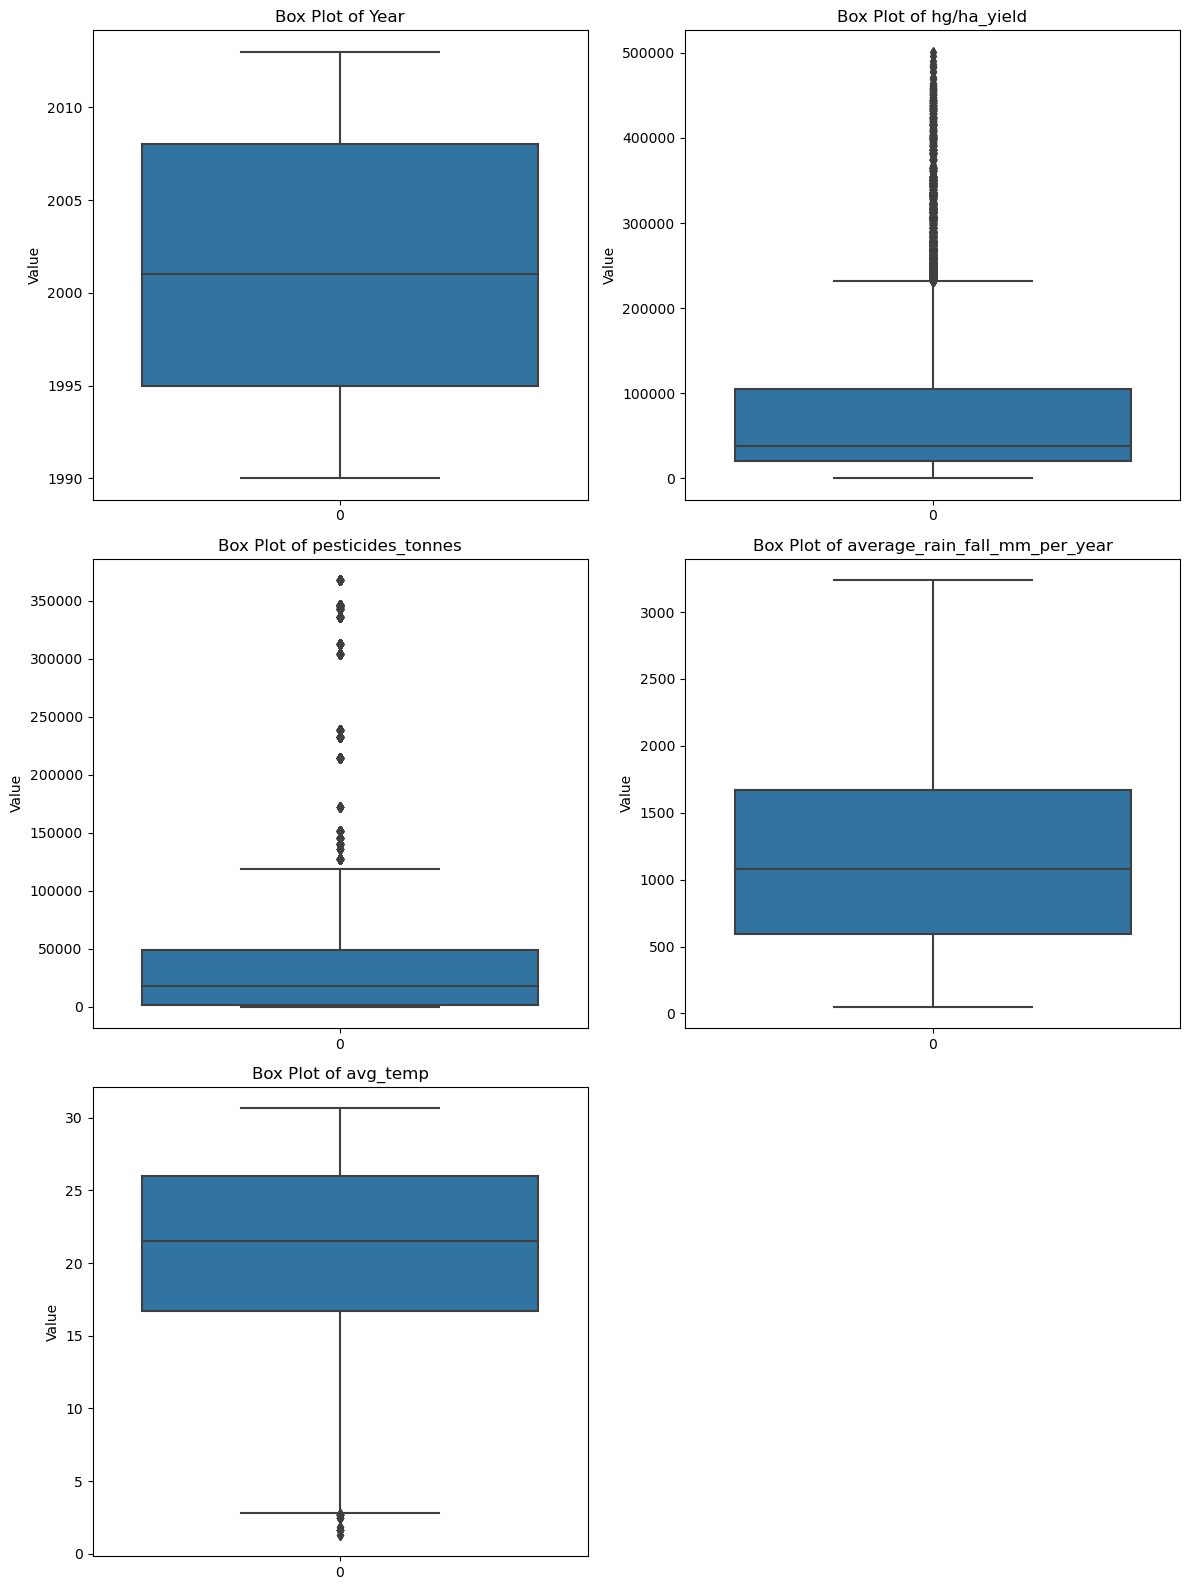

In [16]:
plt.figure(figsize=(12, 16))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=prty[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

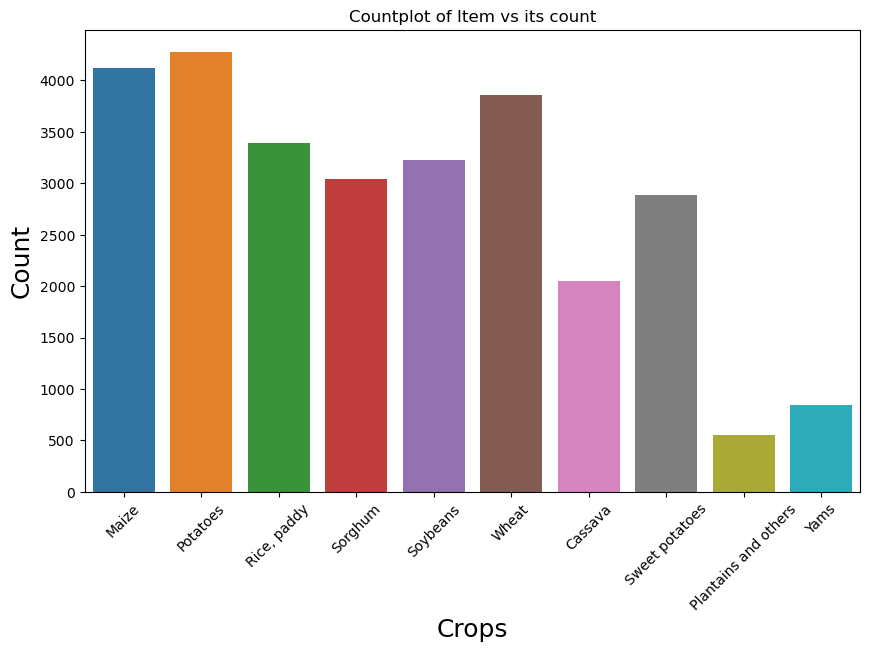

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='Item',data=prty)
plt.title('Countplot of Item vs its count')
plt.xlabel('Crops',fontsize=18,loc='center')
plt.ylabel('Count',fontsize=18,loc='center')
plt.xticks(rotation=45)
plt.show()

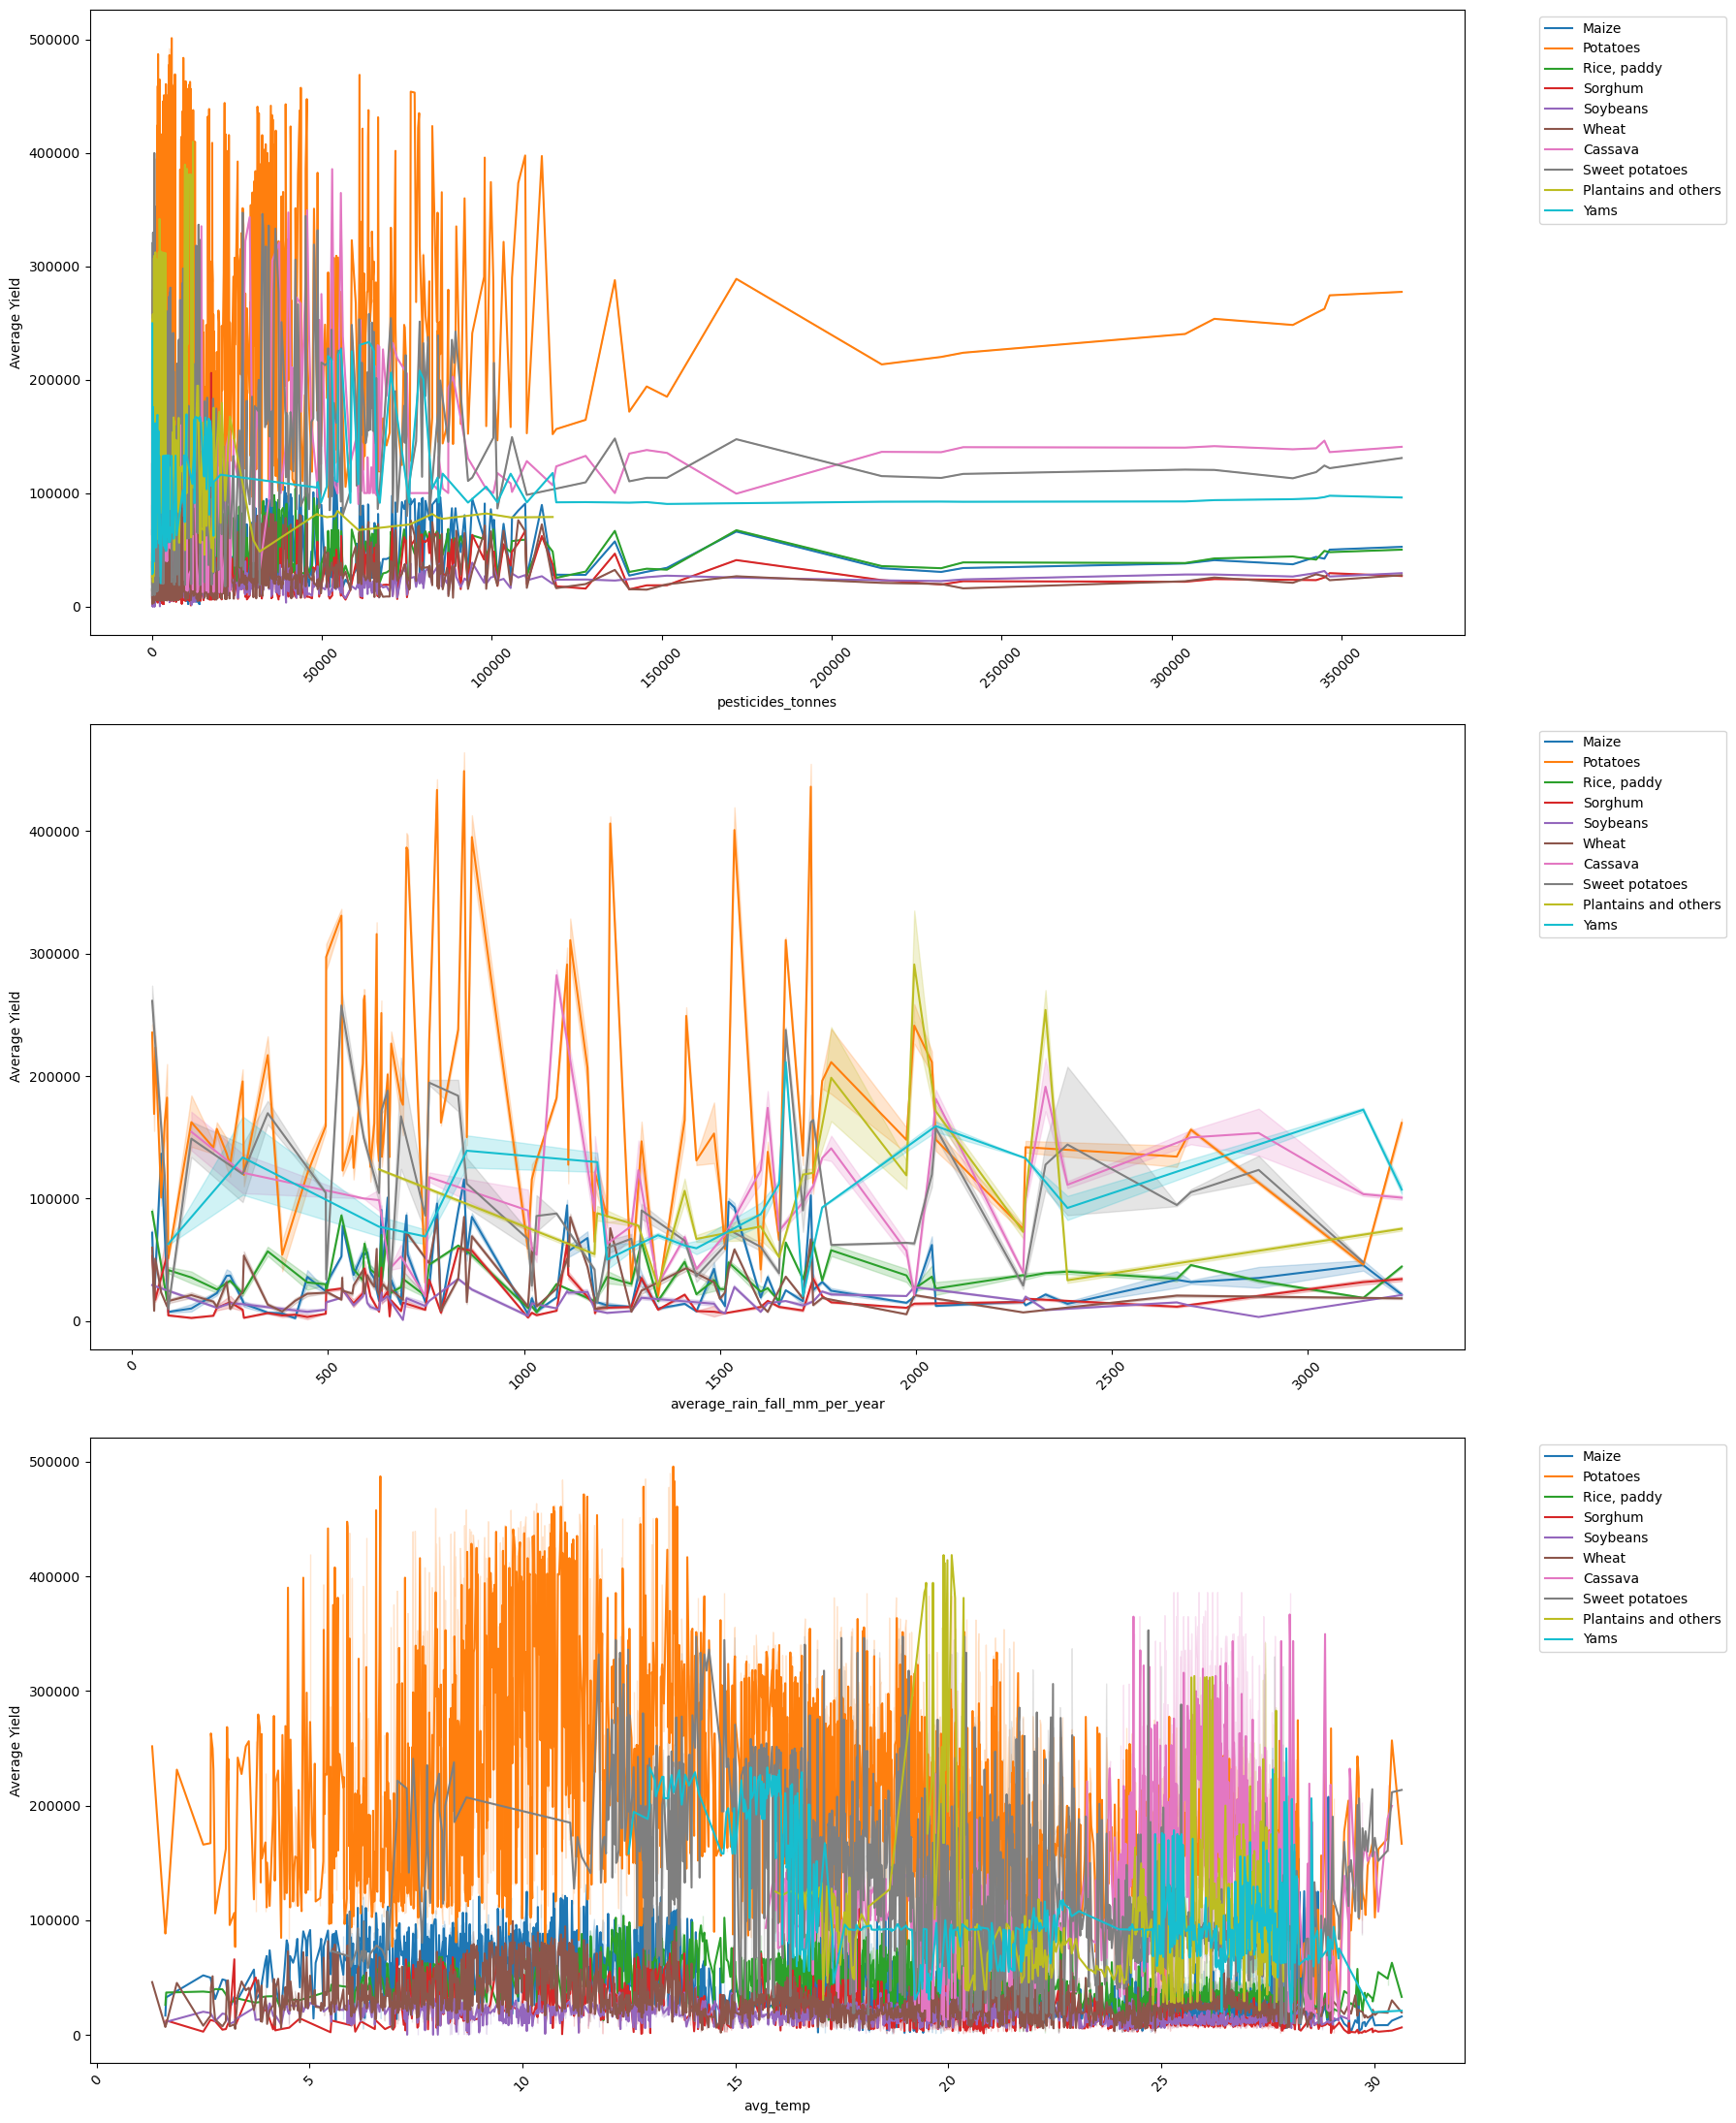

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(18, 22))
sns.lineplot(x = "pesticides_tonnes", y = "hg/ha_yield", hue = "Item", data = prty, ax=axes[0], legend = True)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Yield')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.lineplot(x = "average_rain_fall_mm_per_year", y = "hg/ha_yield", hue = "Item", data = prty, ax=axes[1], legend = True)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average Yield')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.lineplot(x = "avg_temp", y = "hg/ha_yield", hue = "Item", data = prty, ax=axes[2], legend = True)
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel('Average Yield')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

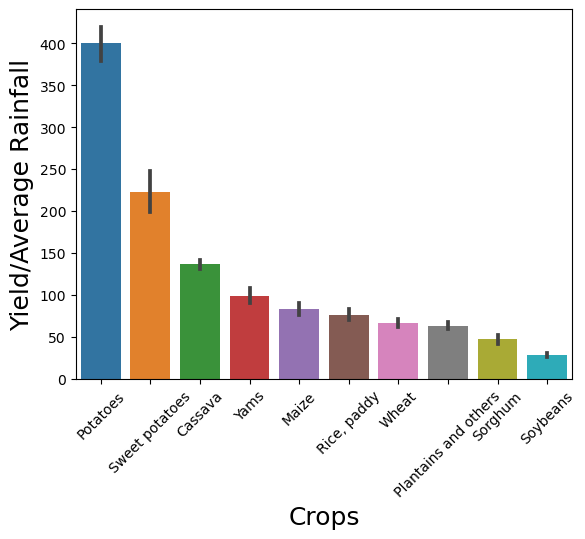

In [19]:
df=prty.copy()
df['yield_rainfall_ratio'] = df['hg/ha_yield'] / df['average_rain_fall_mm_per_year']

top_10_crops = df.groupby('Item')['yield_rainfall_ratio'].mean().sort_values(ascending=False).head(10).index

# Filter the data to only include the top 10 crops
top_10_data = df[df['Item'].isin(top_10_crops)]

sns.barplot(data=top_10_data, x='Item', y='yield_rainfall_ratio', order=top_10_crops)
plt.xlabel('Crops',fontsize=18)
plt.ylabel('Yield/Average Rainfall',fontsize=18)
plt.xticks(rotation=45)
plt.show()

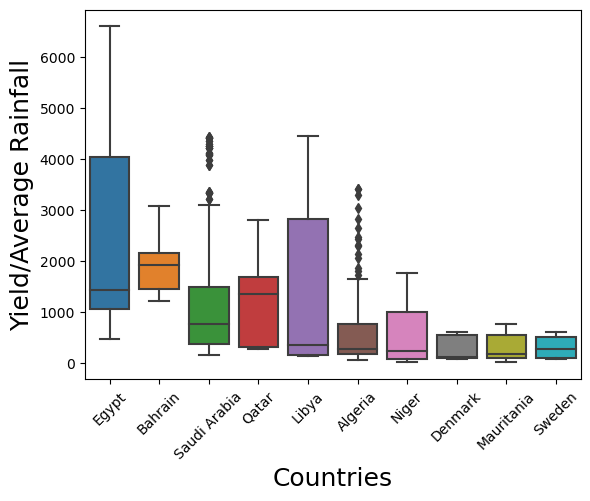

In [20]:
df=prty.copy()
df['yield_rainfall_ratio'] = df['hg/ha_yield'] / df['average_rain_fall_mm_per_year']

top_10_countries = df.groupby('Area')['yield_rainfall_ratio'].mean().sort_values(ascending=False).head(10).index
top_10_data = df[df['Area'].isin(top_10_countries)]

sns.boxplot(data=top_10_data, x='Area', y='yield_rainfall_ratio', order=top_10_countries)
plt.xlabel('Countries',fontsize=18)
plt.ylabel('Yield/Average Rainfall',fontsize=18)
plt.xticks(rotation=45)
plt.show()

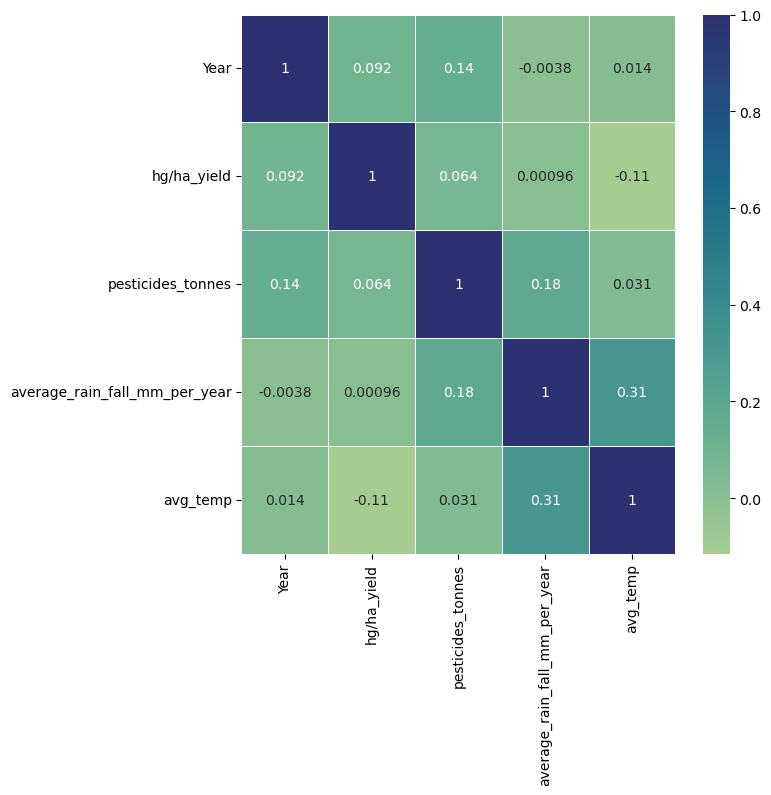

In [21]:
plt.figure(figsize=(7,7))
sns.heatmap(prty.corr(), annot=True,linewidth=.5,cmap='crest')
plt.show()

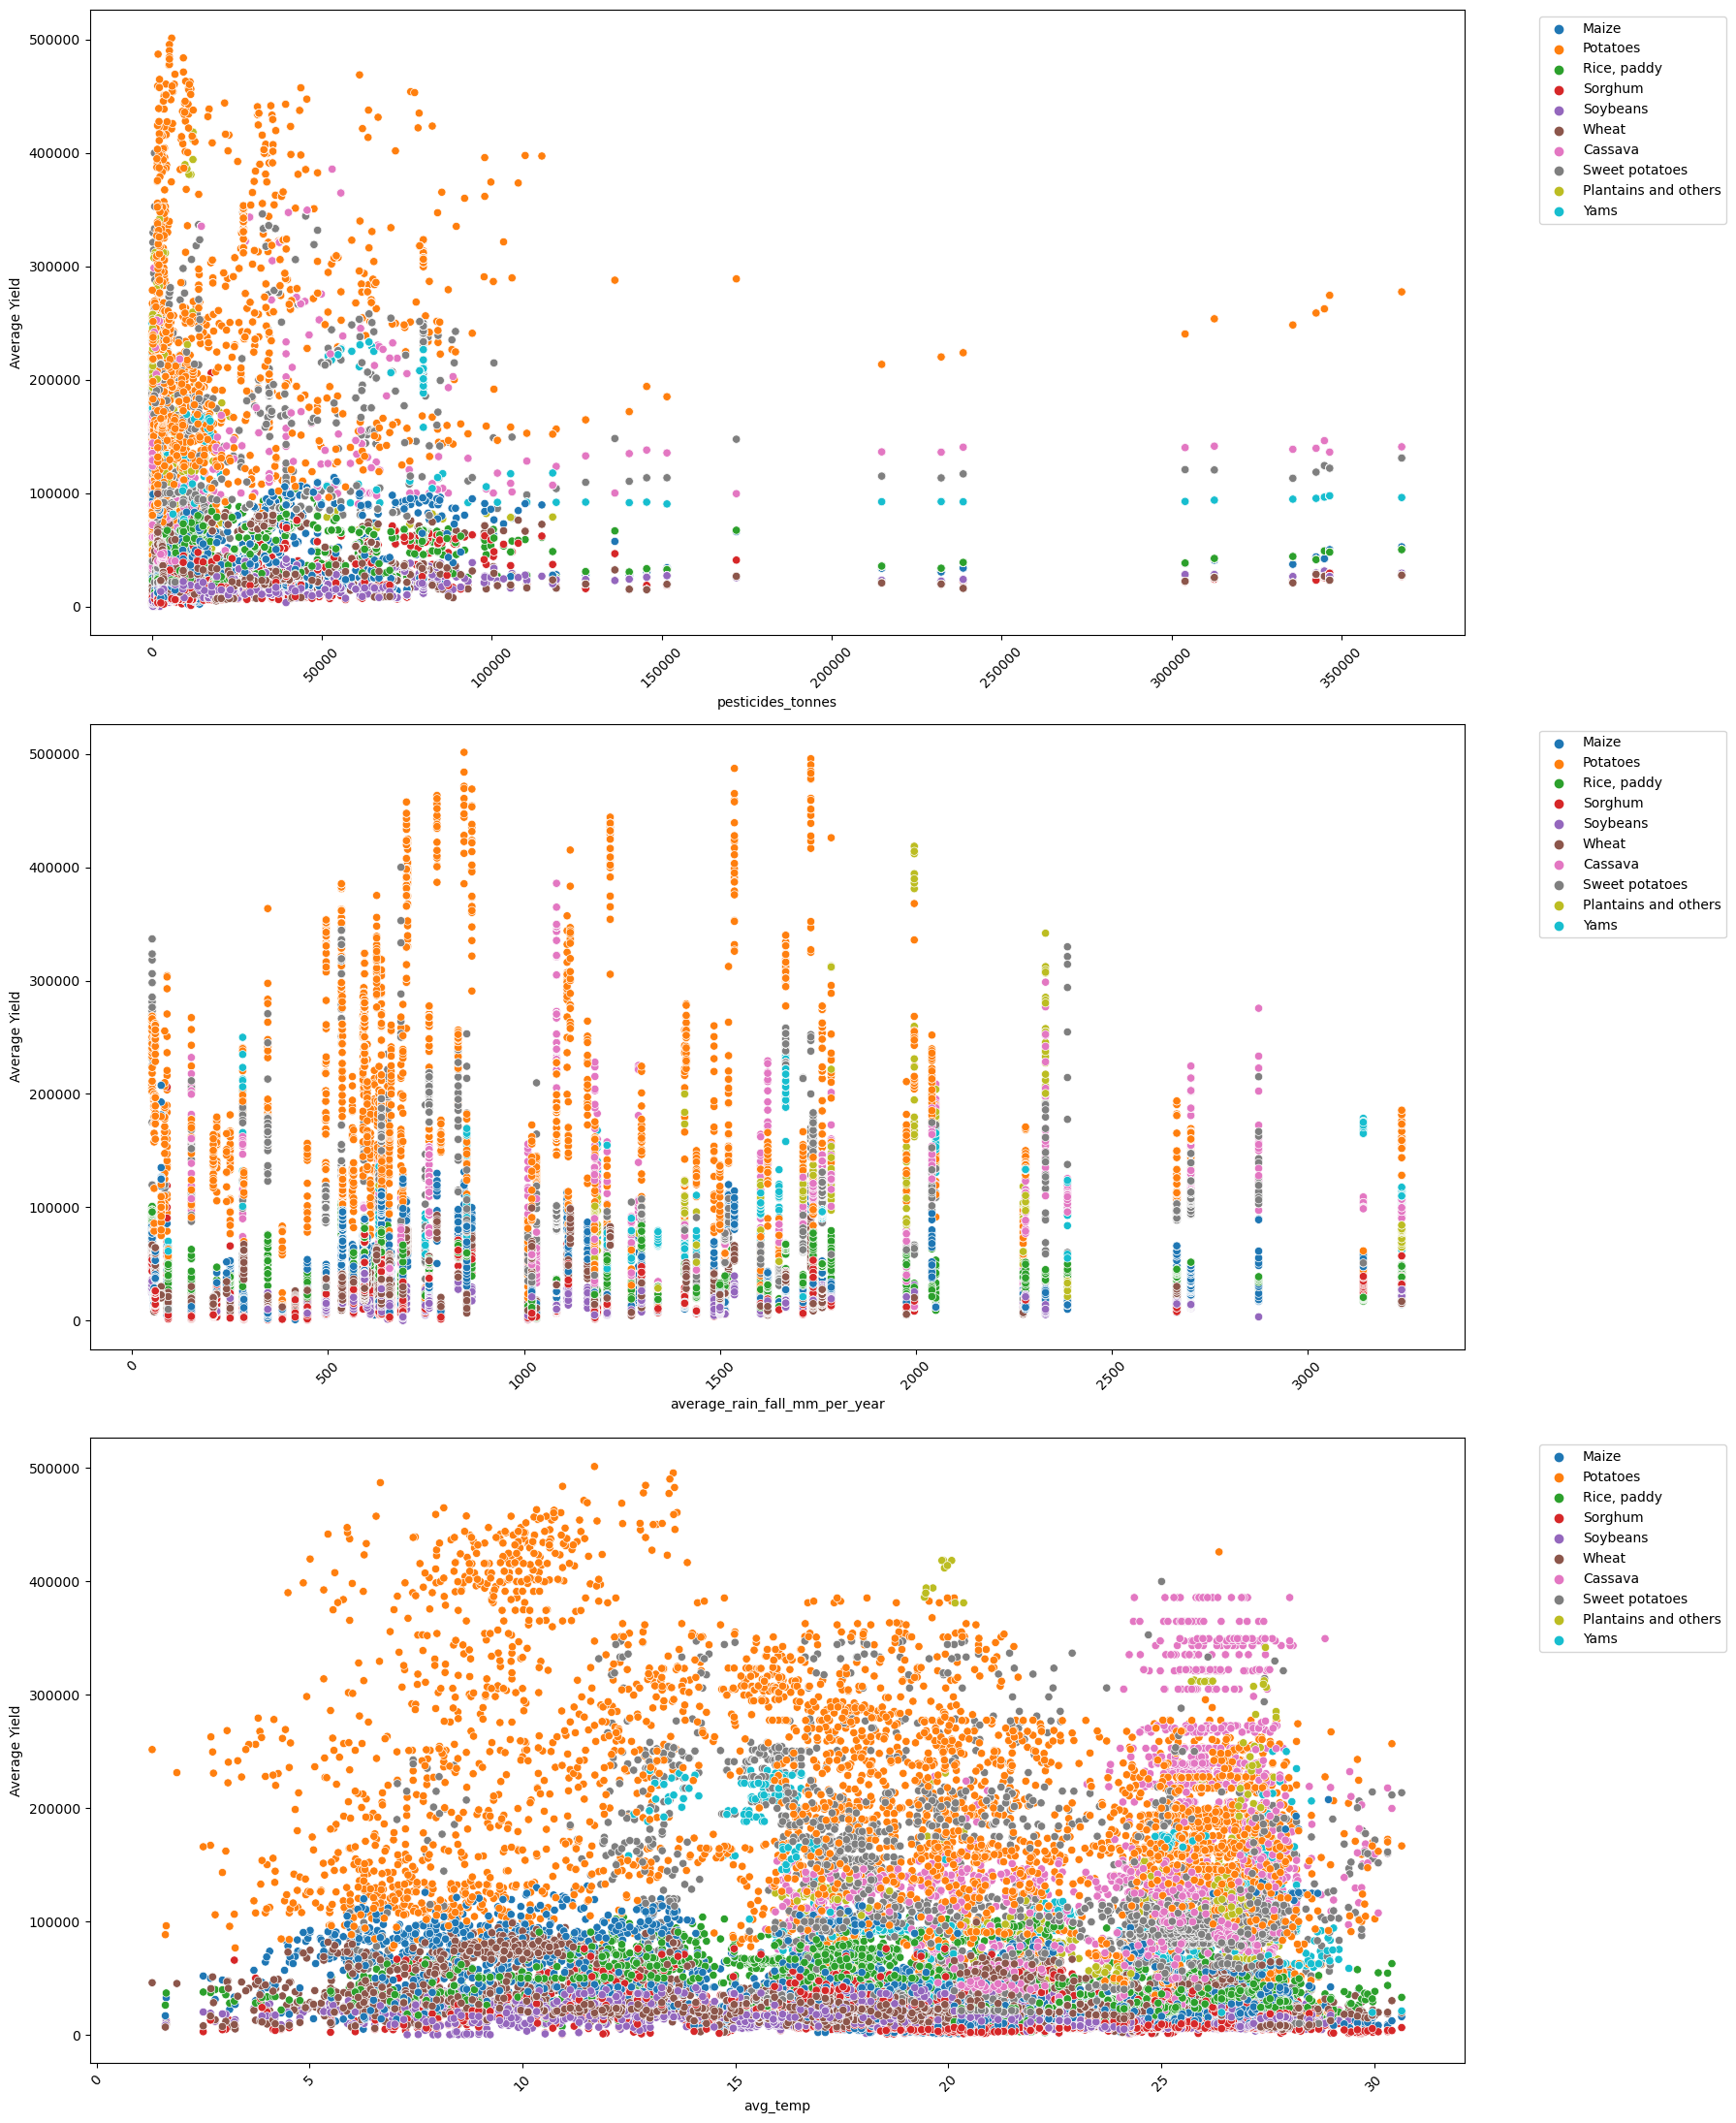

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(18, 22))

sns.scatterplot(x = "pesticides_tonnes", y = "hg/ha_yield", hue = "Item", data = prty, ax=axes[0], legend = True)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Yield')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "average_rain_fall_mm_per_year", y = "hg/ha_yield", hue = "Item", data = prty, ax=axes[1], legend = True)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average Yield')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

sns.scatterplot(x = "avg_temp", y = "hg/ha_yield", hue = "Item", data = prty, ax=axes[2], legend = True)
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_ylabel('Average Yield')
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [23]:
prty.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'pesticides_tonnes',
       'average_rain_fall_mm_per_year', 'avg_temp'],
      dtype='object')

# Data Preprocessing

In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# First, we have performed one hot encoding on the categorical features, and then
# performed standard scaling on all the features
prty=prty.drop('Year',axis=True)
X,y=prty.drop('hg/ha_yield',axis=1),prty['hg/ha_yield']
X = pd.get_dummies(X,columns = cat_cols, drop_first = True)
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [25]:
X

array([[-0.61636612,  0.47329419, -0.66106889, ..., -0.33763138,
        -0.39770719, -0.17583529],
       [-0.61636612,  0.47329419, -0.66106889, ..., -0.33763138,
        -0.39770719, -0.17583529],
       [-0.61636612,  0.47329419, -0.66106889, ..., -0.33763138,
        -0.39770719, -0.17583529],
       ...,
       [-0.57585308, -0.69323228, -0.12399147, ..., -0.33763138,
        -0.39770719, -0.17583529],
       [-0.57585308, -0.69323228, -0.12399147, ...,  2.96180998,
        -0.39770719, -0.17583529],
       [-0.57585308, -0.69323228, -0.12399147, ..., -0.33763138,
         2.51441269, -0.17583529]])

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20,shuffle=True)
print(X_train.shape,X_test.shape)

(22593, 112) (5649, 112)


# Building our Initial model

In [27]:
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

poly=PolynomialFeatures(degree=2,order='C',include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lin_reg=LinearRegression()
lin_reg.fit(X_train_poly,y_train)
y_pred=lin_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 358201981.9877794
R-squared: 0.9506178410842792


# Trying multiple models and Hyperparameter Tuning 

In [28]:
model_names=['svm_regressor','random_forest_regressor','lasso_regressor','XGBoost_Regressor']

svr=SVR(kernel='rbf', gamma='auto')
random_forest=RandomForestRegressor()
lasso_regressor = Lasso(alpha=1.0, random_state=42,max_iter=3000)
xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

models = [svr, random_forest, lasso_regressor, xgb_regressor]

model_params = [
    {},  # SVR doesn't require hyperparameters here
    {'n_estimators': [10, 50, 100]},  # RandomForestRegressor parameters
    {'alpha': [0.1, 1.0, 10.0]},  # Lasso parameters
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]}  # XGBRegressor parameters
]

In [29]:
# Here, we have performed hyperparameter tuning on multiple regression models
# to finally find out the best model

scores = []
best_estimators = {}

for name, model, params in zip(model_names, models, model_params):
#     pipe = make_pipeline(StandardScaler(), model)
    clf = GridSearchCV(model, params, cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[model] = clf.best_estimator_

res = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
res

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.116e+12, tolerance: 1.281e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.126e+12, tolerance: 1.324e+10
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.079e+12, toleranc

,model,best_score,best_params
0,svm_regressor,-0.205069,{}
1,random_forest_regressor,0.973753,{'n_estimators': 100}
2,lasso_regressor,0.745383,{'alpha': 10.0}
3,XGBoost_Regressor,0.968818,"{'learning_rate': 0.5, 'n_estimators': 200}"


In [30]:
best_model=xgb.XGBRegressor(learning_rate=0.5,n_estimators=200)
best_model.fit(X_train,y_train)
y_pred=best_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9717028200915321


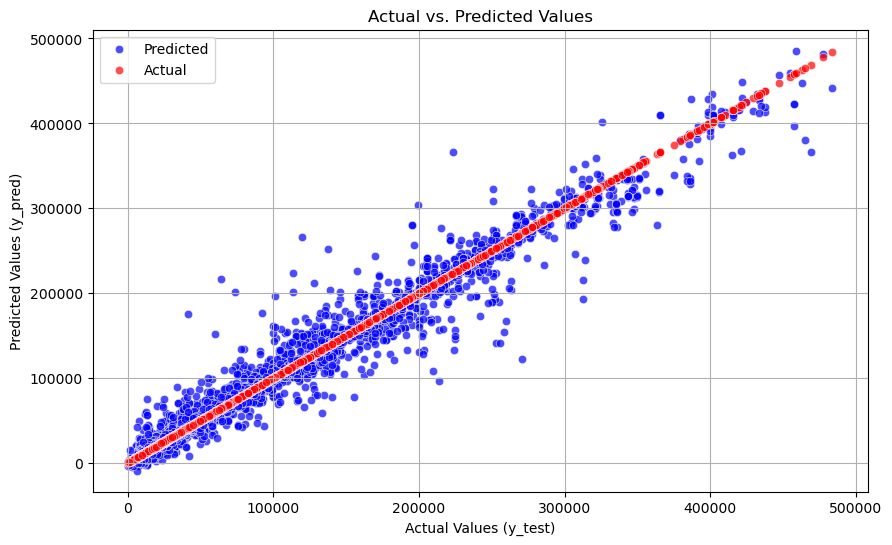

In [31]:
#plotting the results of our model, against the original results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue', label='Predicted')
sns.scatterplot(x=y_test, y=y_test, alpha=0.7, color='red', label='Actual')
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.grid(True)
plt.legend()
plt.show()